In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import itertools
import seaborn as sns
sns.set()
import os

In [2]:
p_info = pd.read_csv('participants_data.csv')

In [3]:
summary = pd.DataFrame()
for pid in p_info['pid']:
    filename = 'result/' + pid + '_MItask.csv'
    if os.path.exists(filename) == False:
        continue
    data = pd.read_csv(filename, index_col=0)
    summary = summary.append(data)

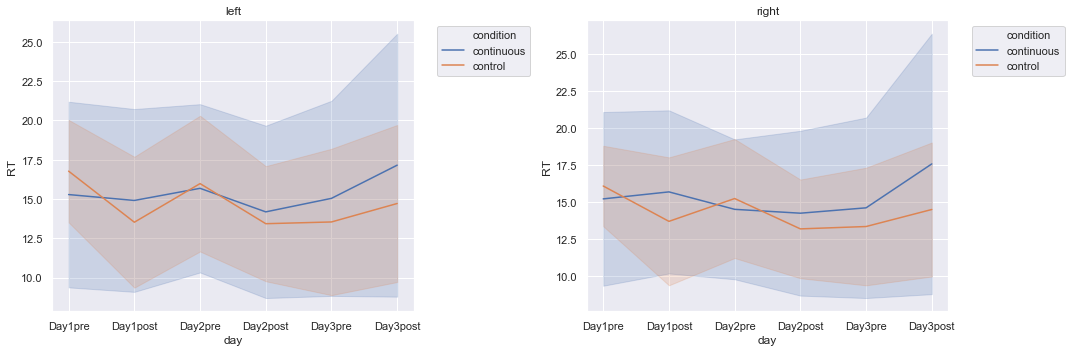

In [4]:
data = summary.groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).mean()
data['day'] = data['day'] + data['timing']
plt.figure(figsize=(15, 5))
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='day', y='RT', hue='condition', ci='sd', sort=None, data=data[data.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title(hand)
plt.tight_layout()

In [5]:
PTsummary = pd.DataFrame()
for pid in p_info['pid']:
    filename = 'result/' + pid + '_PT.csv'
    if os.path.exists(filename) == False:
        continue
    PT_data = pd.read_csv(filename, index_col=0)
    PTsummary = PTsummary.append(PT_data)

C:\Users\OKAMOTO_LAB\Anaconda3\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


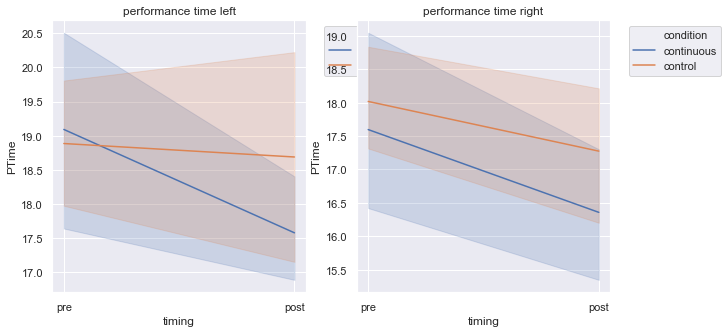

In [6]:
plt.figure(figsize=(10,5))
data = PTsummary.groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).median()
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='timing', y='PTime', hue='condition', sort=False, data=data[data.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('performance time ' + hand)

In [7]:
PTval_df = pd.DataFrame(columns=['pid', 'condition', 'hand', 'val'])
for pid, hand in itertools.product(data['pid'], ['left', 'right']):
    pre = data[(data.pid == pid) & (data.timing == 'pre') & (data.hand == hand)].PTime.item()
    post = data[(data.pid == pid) & (data.timing == 'post') & (data.hand == hand)].PTime
    if len(post) == 0:
        continue
    series = pd.Series([pid, p_info[p_info.pid == pid].condition.item(), hand, 100*(post.item() - pre) / pre], index=PTval_df.columns)
    PTval_df = PTval_df.append(series, ignore_index=True)

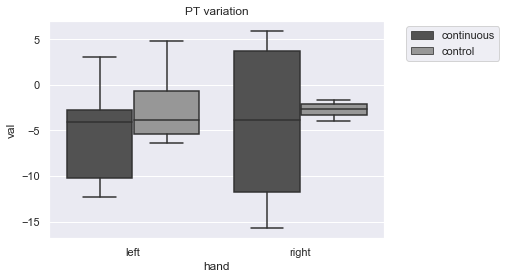

In [21]:
sns.set_palette('Greys_r', 3)
sns.boxplot(x='hand', y='val', hue='condition', data=PTval_df.groupby(['pid', 'condition', 'hand'], sort=None, as_index=False).mean())
plt.title('PT variation')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.savefig('result_img/PT-variation.png')

In [9]:
PTsummary.groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).median()

,pid,condition,timing,hand,trial,PTime
0,P01,continuous,pre,right,2,17.011983
1,P01,continuous,pre,left,2,19.758593
2,P01,continuous,post,right,2,18.019494
3,P01,continuous,post,left,2,17.419555
4,P02,continuous,pre,right,2,15.559868
5,P02,continuous,pre,left,2,16.933237
6,P02,continuous,post,right,2,14.175146
7,P02,continuous,post,left,2,16.490160
8,P03,continuous,pre,right,2,15.672179
9,P03,continuous,pre,left,2,16.194748


In [10]:
MC_df = summary[(summary.day == 'Day1') & (summary.timing == 'pre') & (summary.hand == 'left')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
MC_df['PT'] = PTsummary[(PTsummary.timing == 'pre') & (PTsummary.hand == 'left')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']

In [11]:
data = summary[(summary.day == 'Day1') & (summary.timing == 'pre') & (summary.hand == 'right')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'pre') & (PTsummary.hand == 'right')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [12]:
data = summary[(summary.day == 'Day3') & (summary.timing == 'post') & (summary.hand == 'left')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'post') & (PTsummary.hand == 'left')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [13]:
data = summary[(summary.day == 'Day3') & (summary.timing == 'post') & (summary.hand == 'right')].groupby(['pid', 'condition', 'day', 'timing', 'hand'], sort=None, as_index=False).median()
data['PT'] = PTsummary[(PTsummary.timing == 'post') & (PTsummary.hand == 'right')].groupby(['pid', 'condition', 'timing', 'hand'], sort=None, as_index=False).mean()['PTime']
MC_df = MC_df.append(data)

In [14]:
MC_df['MC'] = abs(MC_df['RT'] - MC_df['PT'])

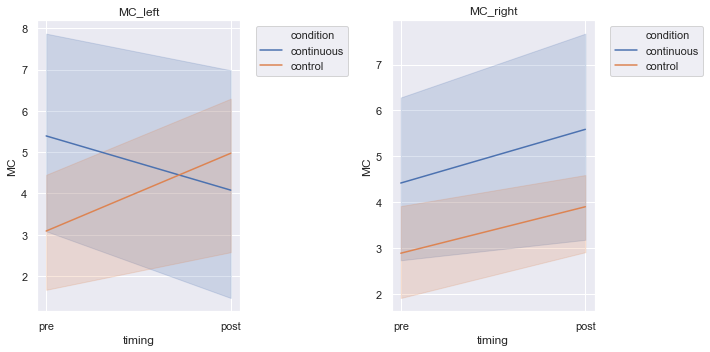

In [15]:
plt.figure(figsize=(10,5))
for i, hand in enumerate(['left', 'right']):
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='timing', y='MC', hue='condition', sort=False, data=MC_df[MC_df.hand == hand])
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.title('MC_' + hand)
plt.tight_layout()
plt.savefig('result_img/MC.png')